# 2) IACOV - Model Development for Prognosis - ICU
## Strategy 2) Training using all hospitals except specific and testing with 30% of the specific hospital


Code below to import libraries when running this point forward

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_1364\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome ICU to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome ICU + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [8]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [9]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [10]:
import ipywidgets as widgets
from IPython.display import clear_output

In [11]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [12]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE                                                
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'
                                               ])

In [13]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [14]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Specific Hospital**

In [15]:
# !pip install ipywidgets

In [16]:
# !jupyter nbextension enable --py widgetsnbextension

In [17]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [1059]:
display(dropdown_hospital)

Dropdown(index=14, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_…

In [1060]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [1061]:
from sklearn.model_selection import train_test_split

In [1062]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(47, 26)

In [1063]:
X_specific = df_iacov_model_lean_specific.drop(['icu'],axis=1)
X_specific.shape

(47, 25)

In [1064]:
y_specific = df_iacov_model_lean_specific['icu']
y_specific.shape

(47,)

In [1065]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [1066]:
X_train_specific.shape

(32, 25)

In [1067]:
X_test_specific.shape

(15, 25)

**Filter all hospitals except the selected above**

PS: Also removed GHC hospital due to very low positive cases

In [1068]:
df_iacov_model_lean = df_all_hospitals[ (df_all_hospitals.city_hospital != specific_hospital) & (df_all_hospitals.city_hospital != 'GHC_02')]
df_iacov_model_lean.shape

(5999, 26)

In [1069]:
#check data without specific
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
Name: count, dtype: int64

In [1070]:
print("Specific: " + specific_hospital )
print("(training - all hospitals) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: AMAZONAS_HUGV
(training - all hospitals) dataset: (5999, 26)

(training - specific) dataset: (32, 25)

(test - specific) dataset: (15, 25)


### 2.1.3) Dropping unused variables - city_hospital (All hospitals)

In [1071]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(5999, 25)

In [1072]:
#Preencho NAs com 0 
df_iacov_model_lean['icu'] = df_iacov_model_lean['icu'].fillna(0)
df_iacov_model_lean.icu.value_counts()

icu
0    3277
1    2722
Name: count, dtype: int64

In [1073]:
#Check proportion of ICU on training data 
(df_iacov_model_lean.icu.value_counts()/len(df_iacov_model_lean.icu))*100

icu
0   54.626
1   45.374
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [1074]:
df_iacov_model_lean['class'] = df_iacov_model_lean['icu'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [1075]:
# filtered_df.loc[1158,'sys_press'] = 50
# filtered_df.loc[1158,'dias_press'] = 100

In [1076]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [1077]:
#Check mean_press missing before recalculating
#column_summaries(df_iacov_model_lean)

In [1078]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [1079]:
#Check mean_press missing after recalculating
#column_summaries(df_iacov_model_lean)

In [1080]:
#column_summaries(df_iacov_model_lean_specific)

In [1081]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [1082]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [1083]:
x_test_specific_name = 'X_test_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_NORTE_AM_AMAZONAS_HUGV.csv'

In [1084]:
y_test_specific_name = 'y_icu_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_icu_NORTE_AM_AMAZONAS_HUGV.csv'

In [1085]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(15, 25)

In [1086]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(15,)

## 2.2) Prepare Experiment 

### All hospitals except specific

In [1087]:
df_iacov_model_lean.shape

(5999, 25)

In [1088]:
df_iacov_model_train = df_iacov_model_lean

In [1089]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)

In [1090]:
#import inspect
#inspect.getsource(setup)

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [1091]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 47 to 6045
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              5999 non-null   float64
 1   male             5999 non-null   float64
 2   heart_rate       5192 non-null   float64
 3   resp_rate        4548 non-null   float64
 4   sys_press        4666 non-null   float64
 5   dias_press       4677 non-null   float64
 6   mean_press       5006 non-null   float64
 7   temp             4838 non-null   float64
 8   hemoglobin       4096 non-null   float64
 9   platelets        5257 non-null   float64
 10  hematocrit       3650 non-null   float64
 11  red_cells_count  3318 non-null   float64
 12  hcm              4812 non-null   float64
 13  rdw              4810 non-null   float64
 14  mcv              4817 non-null   float64
 15  leukocytes       5259 non-null   float64
 16  neutrophil       3928 non-null   float64
 17  lymphocytes      4

In [1092]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(5999, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [1093]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [1094]:
X_train.shape

(4588, 22)

In [1095]:
X_test.shape

(1800, 22)

In [1096]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1097]:
seed

42

### Filtering only 5 pre-selected models

In [1098]:
# print(inspect.getsource(compare_models))

In [1099]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.834100,0.915700,0.848700,0.819500,0.824900,0.836500,0.668300,0.000000,0.000000,0.513000
1,CatBoost Classifier,0.834100,0.914900,0.839200,0.829100,0.831000,0.834900,0.668300,0.385300,0.541600,0.527600
2,Light Gradient Boosting Machine,0.830900,0.914600,0.846100,0.815600,0.821200,0.833300,0.661700,0.152500,0.183500,0.522500


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [1100]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.819,0.907,0.821,0.817,0.817,0.819,0.638,0.001,0.000,0.488
1,0.850,0.936,0.878,0.822,0.831,0.854,0.699,0.616,0.361,0.590
2,0.837,0.918,0.852,0.822,0.826,0.839,0.673,0.017,0.014,0.535
3,0.824,0.908,0.860,0.787,0.801,0.830,0.647,0.000,0.000,0.487
4,0.850,0.930,0.861,0.838,0.843,0.852,0.699,0.181,0.042,0.569
5,0.828,0.924,0.826,0.830,0.830,0.828,0.656,0.009,0.016,0.539
6,0.837,0.918,0.865,0.808,0.819,0.841,0.673,0.002,0.014,0.541
7,0.828,0.913,0.826,0.830,0.830,0.828,0.656,0.123,0.002,0.511
8,0.814,0.905,0.830,0.799,0.805,0.817,0.629,0.000,0.000,0.480
9,0.845,0.920,0.865,0.825,0.832,0.848,0.690,0.305,0.046,0.549


In [1101]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.830,0.920,0.891,0.770,0.794,0.840,0.660,0.000,0.000,0.443
1,0.830,0.938,0.921,0.739,0.779,0.844,0.660,0.000,0.000,0.487
2,0.817,0.916,0.882,0.752,0.780,0.828,0.634,0.000,0.000,0.453
3,0.813,0.912,0.891,0.735,0.770,0.826,0.625,0.000,0.000,0.393
4,0.824,0.926,0.904,0.742,0.779,0.837,0.647,0.000,0.000,0.469
5,0.834,0.929,0.878,0.790,0.808,0.842,0.669,0.000,0.000,0.493
6,0.821,0.922,0.891,0.751,0.782,0.833,0.643,0.000,0.000,0.444
7,0.819,0.915,0.865,0.773,0.793,0.827,0.638,0.000,0.000,0.445
8,0.817,0.909,0.882,0.751,0.780,0.828,0.633,0.000,0.000,0.415
9,0.821,0.918,0.882,0.760,0.786,0.831,0.642,0.000,0.000,0.451


In [1102]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.819,0.913,0.917,0.722,0.766,0.835,0.638,0.000,0.002,0.484
1,0.821,0.932,0.956,0.687,0.753,0.842,0.643,0.000,0.001,0.494
2,0.808,0.909,0.904,0.713,0.758,0.825,0.617,0.000,0.000,0.465
3,0.797,0.901,0.913,0.683,0.741,0.818,0.595,0.000,0.000,0.421
4,0.828,0.918,0.922,0.734,0.777,0.843,0.656,0.000,0.002,0.491
5,0.817,0.921,0.891,0.742,0.776,0.830,0.634,0.000,0.052,0.526
6,0.797,0.907,0.896,0.699,0.749,0.816,0.595,0.000,0.000,0.454
7,0.808,0.897,0.887,0.729,0.767,0.823,0.616,0.000,0.000,0.448
8,0.803,0.892,0.895,0.712,0.756,0.820,0.607,0.000,0.000,0.419
9,0.817,0.914,0.913,0.721,0.766,0.833,0.633,0.000,0.000,0.477


### Select best algorithm based on AUC in predicts 
##### In previous code (death) this title was indicating that this selection was being done in test data, however it seems that it is based on training

In [1103]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.811,0.888,0.786,0.832,0.795,0.791,0.619,0.000,0.000,0.445


In [1104]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.799,0.891,0.842,0.763,0.747,0.792,0.599,0.000,0.000,0.362


In [1105]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.787,0.892,0.863,0.724,0.722,0.786,0.578,0.000,0.000,0.404


### Best model

In [1106]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
#preds = preds_lgb
preds = preds_xgb

In [1107]:
npv(y_test, preds['Label'])

0.8640776699029126

In [1108]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.88', '0.91']

,,
,,
Ground Truth Prevalence,. . .,0.454
Test set Prevalence,. . .,0.542
True positive rate (recall),. . .,0.863
False positive rate,. . .,0.276
Positive predictive value (precision),. . .,0.722
True negative rate (specificity),. . .,0.724
False negative rate,. . .,0.137
Negative predictive value,. . .,0.864
Positive likelihood ratio (bigger is better),. . .,3.130


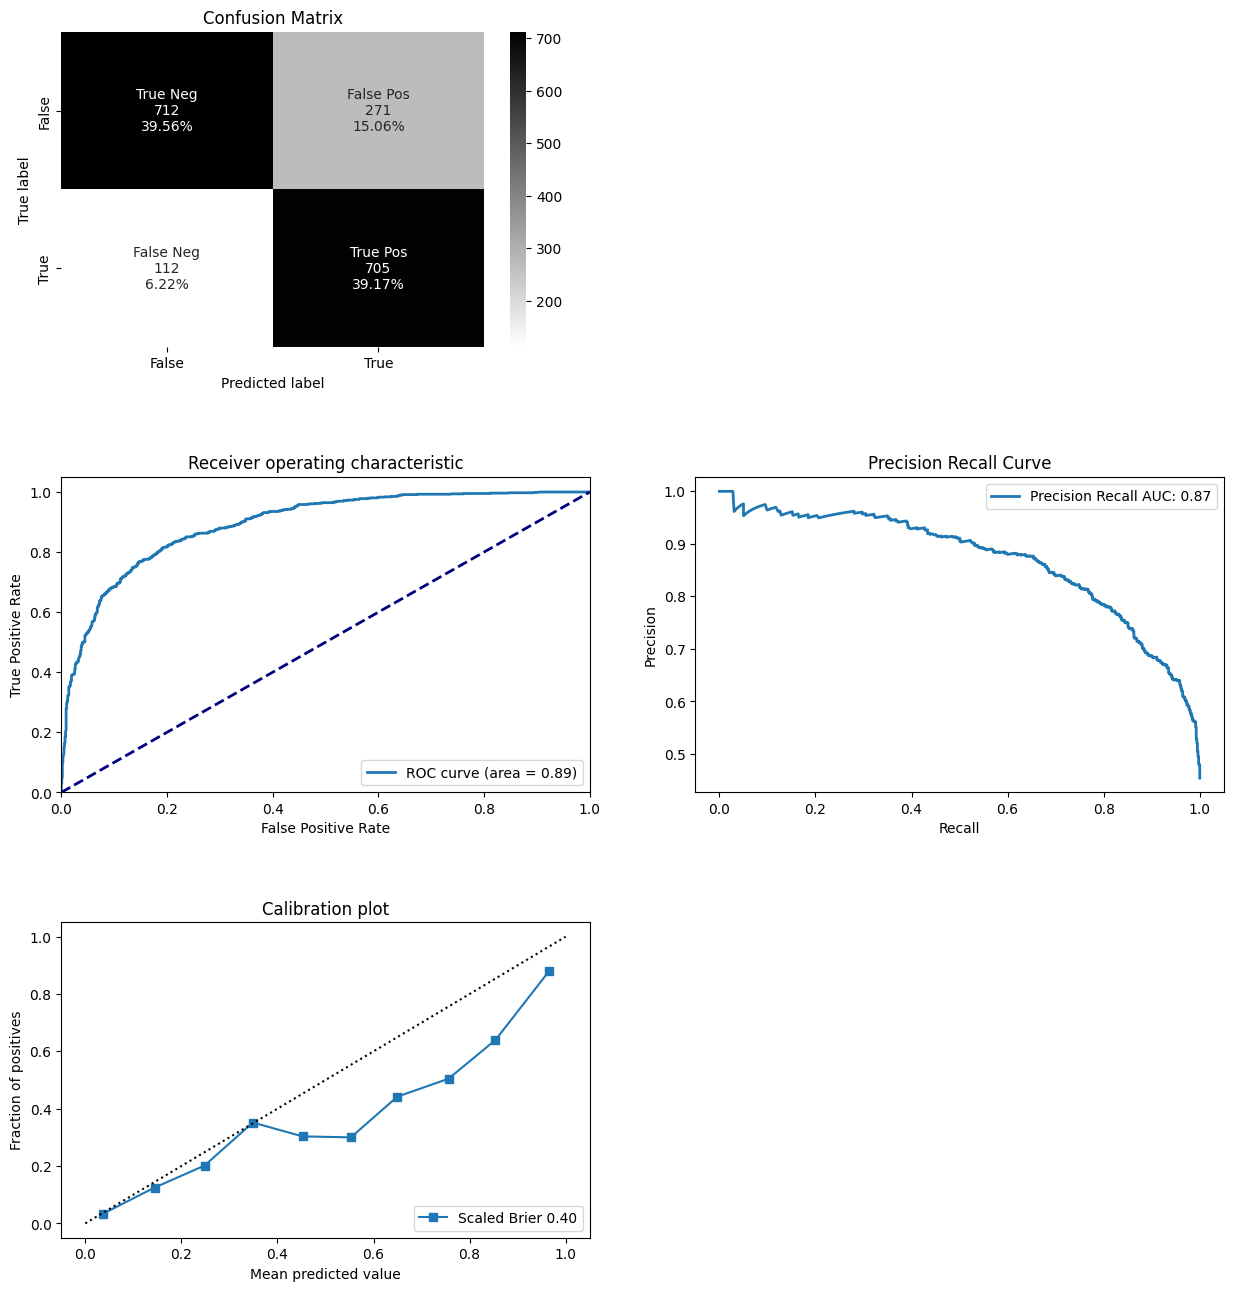

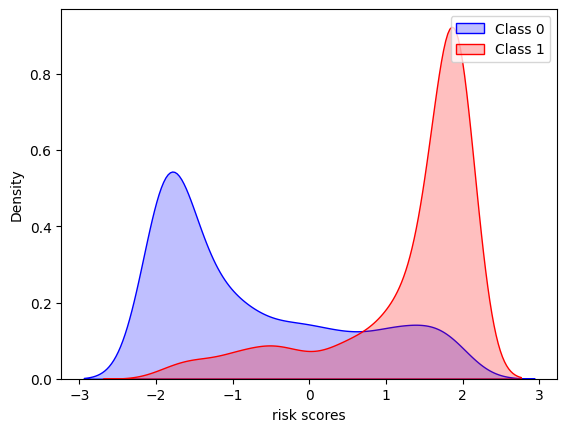

,,
,,
Ground Truth Prevalence,. . .,0.454
Test set Prevalence,. . .,0.542
True positive rate (recall),. . .,0.863
False positive rate,. . .,0.276
Positive predictive value (precision),. . .,0.722
True negative rate (specificity),. . .,0.724
False negative rate,. . .,0.137
Negative predictive value,. . .,0.864
Positive likelihood ratio (bigger is better),. . .,3.130


In [1109]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [1111]:
# evaluate_model(xgbtuned)

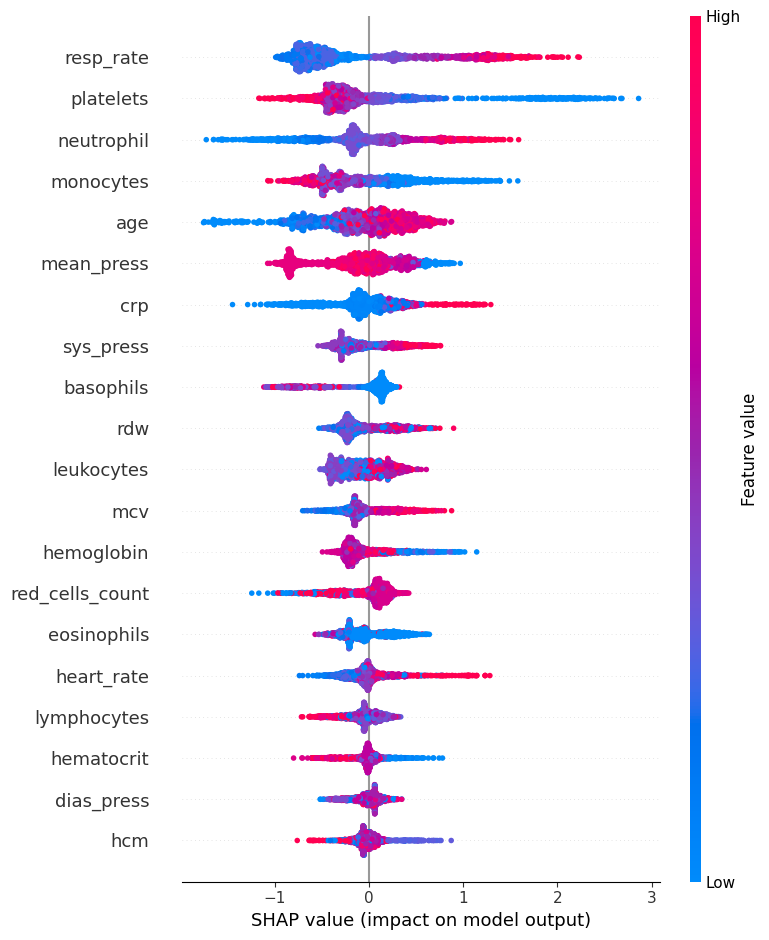

In [1112]:
#interpret_model(cattuned)
#interpret_model(lgbmtuned)
interpret_model(xgbtuned)

In [1113]:
# plot_model(lgbmtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [1114]:
#final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
final_model = finalize_model(xgbtuned)

### 2.3.2) Using model to predict unseen outcome

In [1115]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [1116]:
final_model_name = str(final_model.__class__.__name__) + '_all_vs_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'XGBClassifier_all_vs_one_NORTE_AM_AMAZONAS_HUGV'

In [1117]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


# Use the saved model to predict on specific hospital
## ALL_EXCEPT_ONE is the name of this strategy

In [1119]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)
all_except_one_model_pkl = final_model_name + ".pkl"
prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

loaded: XGBClassifier_all_vs_one_NORTE_AM_AMAZONAS_HUGV


In [1120]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(15, 25)

In [1121]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["icu"]
y_test_single.shape

(15,)

In [1122]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
31,AMAZONAS_HUGV,66.000,0.000,89.000,28.000,130.000,69.000,89.313,37.500,11.160,296500.000,34.720,4.400,29.520,13.000,91.870,17060.000,14212.000,1023.000,124.000,0.000,1699.000,94.000,NORTE,AM
1,AMAZONAS_HUGV,61.000,1.000,86.000,18.000,172.000,75.000,107.301,34.800,11.600,110900.000,35.960,4.370,26.660,11.790,82.250,12710.000,12201.000,381.000,0.000,0.000,127.000,15.100,NORTE,AM
29,AMAZONAS_HUGV,75.000,0.000,82.000,24.000,128.000,80.000,95.984,36.400,12.010,198500.000,35.940,4.200,28.580,10.330,85.500,4270.000,3112.000,835.000,19.000,2.000,299.000,3.200,NORTE,AM
21,AMAZONAS_HUGV,66.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11.750,453800.000,36.890,4.110,28.550,11.680,89.620,8242.000,5114.000,1534.000,53.000,198.000,1340.000,20.900,NORTE,AM
2,AMAZONAS_HUGV,28.000,1.000,80.000,30.000,117.000,56.000,76.313,37.400,6.400,237000.000,20.100,2.470,25.800,13.500,81.500,11400.000,9784.000,776.000,63.000,126.000,651.000,200.400,NORTE,AM


In [1123]:
X_test_single["class"] = y_test_single

In [1124]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [1125]:
X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Categorical
resp_rate,Numeric
sys_press,Categorical
dias_press,Categorical
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Categorical


In [1126]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [1127]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1128]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1129]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

[]

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [1130]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [1131]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1132]:
X_test_single_transformed.shape

(15, 22)

In [1133]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

**Reorder columns**

In [1134]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(15, 22)

0.7727272727272727


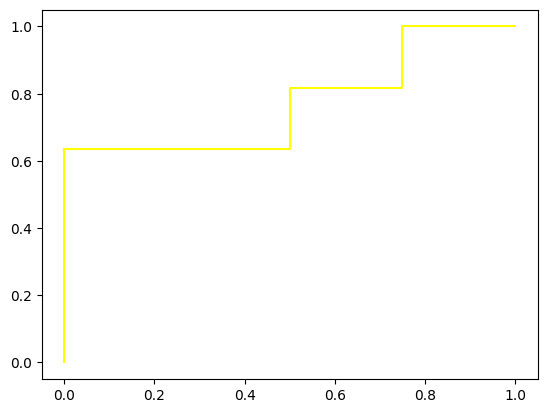

In [1135]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_except_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - LightGBM - AUC " +  str(auc_ind), color="yellow")

In [1136]:
y_pred = all_except_one_model.predict(X_test_single_transformed)

In [1137]:
y_test_single.value_counts()

icu
1    11
0     4
Name: count, dtype: int64

,,
,,
Ground Truth Prevalence,. . .,0.733
Test set Prevalence,. . .,0.667
True positive rate (recall),. . .,0.727
False positive rate,. . .,0.500
Positive predictive value (precision),. . .,0.800
True negative rate (specificity),. . .,0.500
False negative rate,. . .,0.273
Negative predictive value,. . .,0.400
Positive likelihood ratio (bigger is better),. . .,1.455


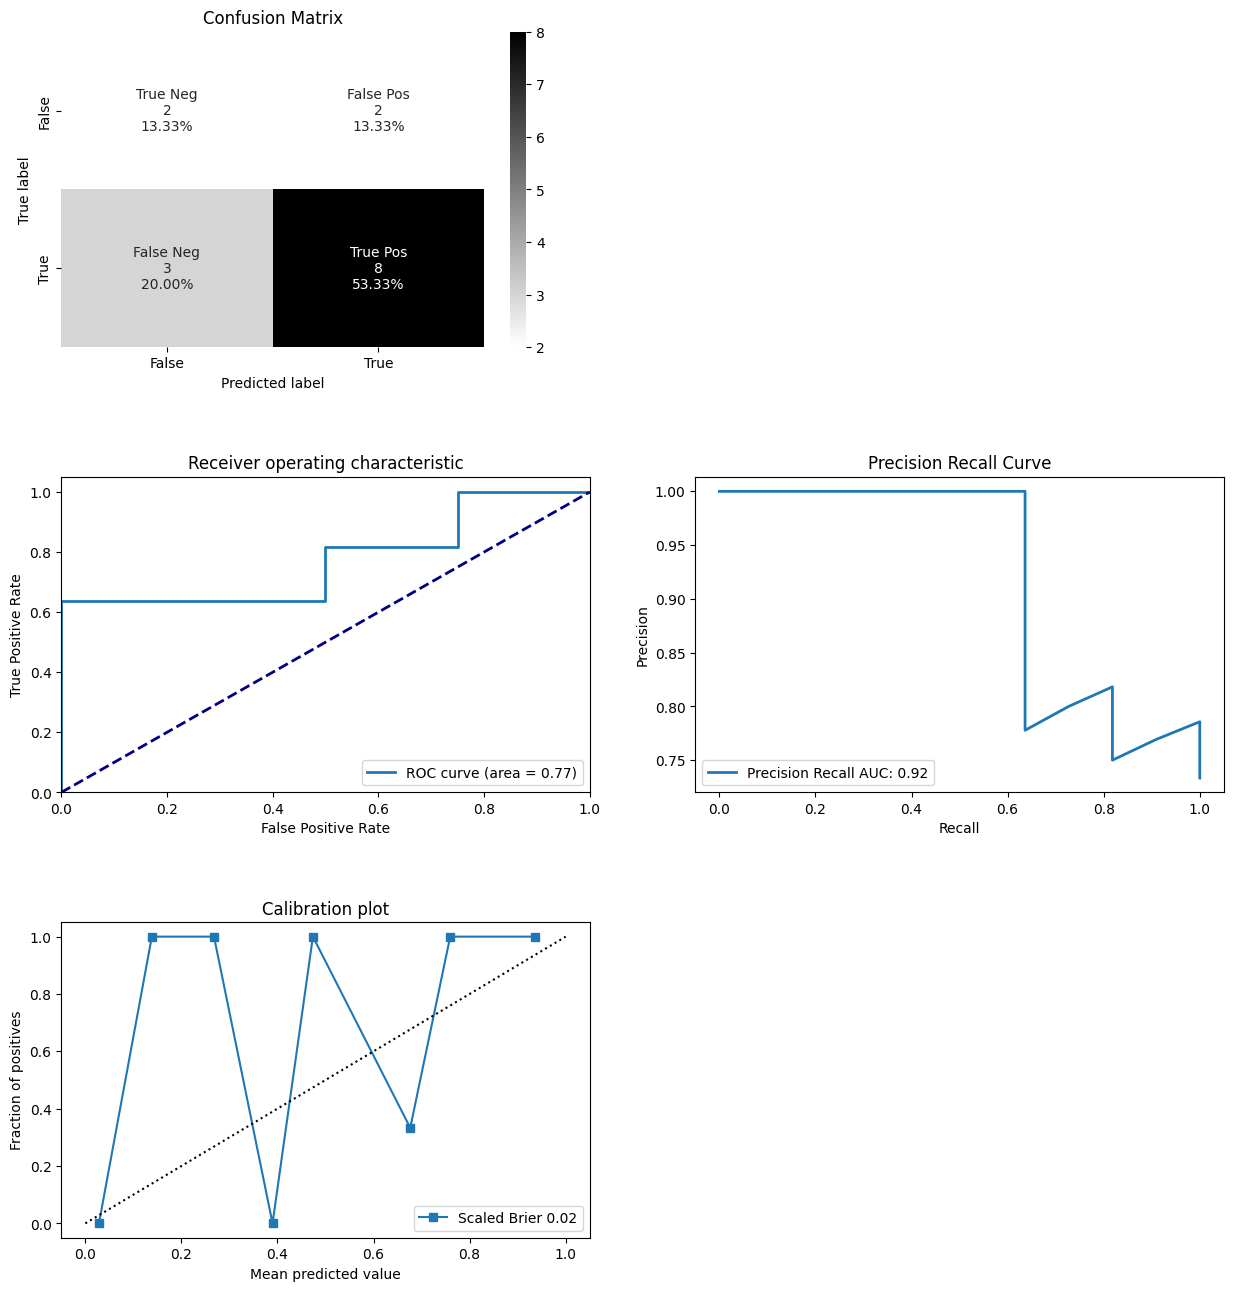

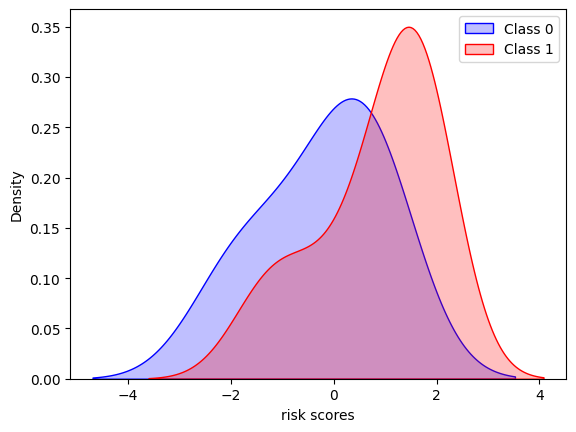

,,
,,
Ground Truth Prevalence,. . .,0.733
Test set Prevalence,. . .,0.667
True positive rate (recall),. . .,0.727
False positive rate,. . .,0.500
Positive predictive value (precision),. . .,0.800
True negative rate (specificity),. . .,0.500
False negative rate,. . .,0.273
Negative predictive value,. . .,0.400
Positive likelihood ratio (bigger is better),. . .,1.455


In [1138]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [1139]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.7727272727272727

In [1140]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.52', '1.00']

In [1141]:
#recall
tpr(y_test_single, y_pred)

0.7272727272727273

In [1142]:
#specificity
tnr(y_test_single, pd.Series(y_pred))

0.5

In [1143]:
#accuracy
accuracy(y_test_single, y_pred)

0.6666666666666666

In [1144]:
ppv(y_test_single, y_pred)

0.8

In [1145]:
npv(y_test_single, y_pred)

0.4

# End of File